In [1]:
import numpy as np
import pandas as pd

#loading the dataset
df=pd.read_csv('spam.csv',sep=',',encoding='latin-1')
#df=pd.read_csv('spam.csv')
print(df)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [2]:

#finding no. of rows and columns
print(df.shape)


(5572, 5)


In [3]:

############### data cleaning #######################
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [4]:

#dropping unnecessary columns...with no or less non null values
#unnamed2 has 50
#unnamed3 has 12
#unnamed4 has 6 non null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #inplace =true as we want to make changes in original dataset
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:

#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
print("****after renaming and removing extra columns:****\n")
print(df)

****after renaming and removing extra columns:****

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:

#using label encoder for assignng ham=0 and spam=1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target']) #ham assigned with 0 and spam with 1
print("****assigning ham=0 and spam=1***")
print(df.head())


****assigning ham=0 and spam=1***
   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [7]:

#checking for missing values
print(df.isnull().sum())


target    0
text      0
dtype: int64


In [8]:

#checking for duplicate values
print("*** no of duplicate values *****")
print(df.duplicated().sum())


*** no of duplicate values *****
403


In [9]:

#removing duplicates
df=df.drop_duplicates(keep='first')
print("** after removing duplicates****")
print(df.duplicated().sum())


** after removing duplicates****
0


In [10]:
df.shape

(5169, 2)

In [11]:

################# EDA (data analysis) ###################
#Exploratory Data Analysis

#checking percentage of spam and ham
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

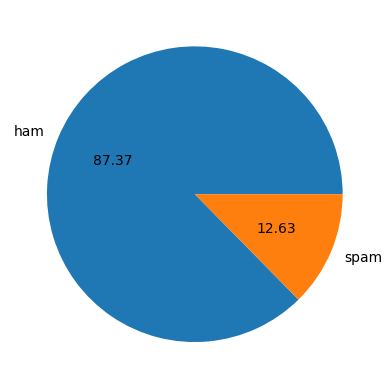

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show() #data is imbalaned


In [14]:

import nltk   #natural language toolkit
nltk.download('punkt')
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

df['num_characters']=df['text'].apply(len) #gives the number of characters in each row of the text...stored them in a new column
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #finding no of words in the text
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:

#analysing ham and spam messages using desc
print("*** analysing ham messages ***")
print(df[df['target']==0][['num_characters','num_words','num_sentences']].describe())
print("*** analysing spam messages ***")
print(df[df['target']==1][['num_characters','num_words','num_sentences']].describe())
#on analysing...we found spam meassages are a bit longer than ham


*** analysing ham messages ***
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.120903       1.799601
std         56.358207    13.493725       1.278465
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      28.000000
*** analysing spam messages ***
       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.967841
std         30.137753    7.008418       1.483201
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       8.000000


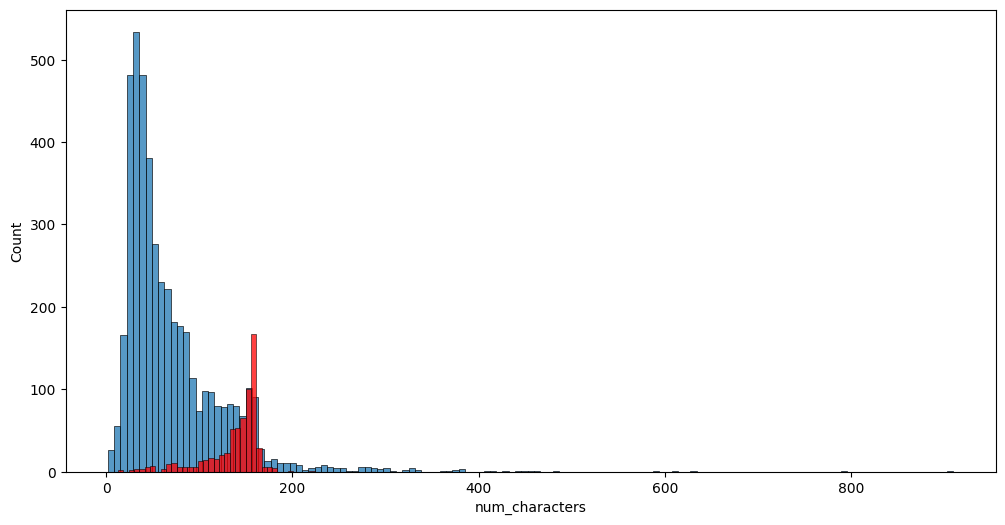

In [19]:

import seaborn as sns
#plotitng the analysis using histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()


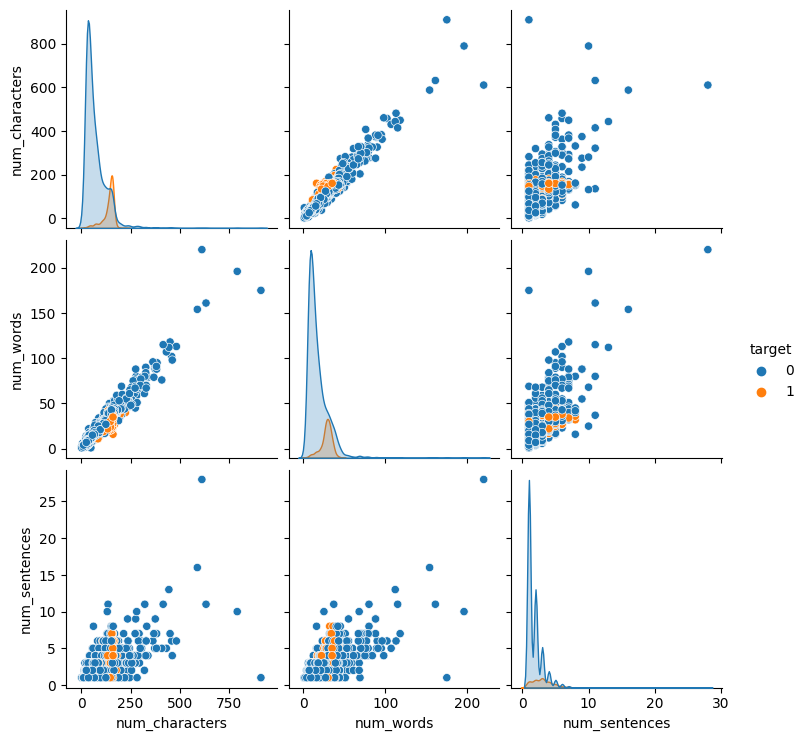

In [20]:

#finding relation of no. of sentences with no. of words

sns.pairplot(df,hue='target')
plt.show()
#from pairplots...it is know that data has outliers


C:\Users\Dell\AppData\Local\Temp\ipykernel_9632\1853751996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


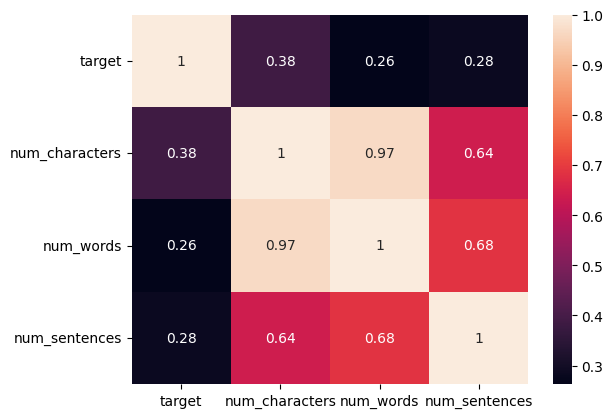

In [21]:

#analysing correlation coefficient using heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()  #data has multicolinearity...we'll take num_char as its correlation with target is high


In [22]:


####################### Data Preprocessing ####################
#1. Lower case
#2. Tokenization
#3. Removing special characters
#4. Removing stop words and puntuation
#5. Stemming

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()

def transform_text(text):
    #converting text to lower
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    #removing special char
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    # removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  
    text=y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))            
   
    return " ".join(y)        

transform_text('Hey! Did you like my ML project?')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'hey like ml project'

In [ ]:


df['transformed_text'] = df['text'].apply(transform_text)
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
####### creating wordcloud for spam and ham, representing most common words
## firstly do pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)  #shows all the common words in spam messages

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)  #shows most commin words in ham messages

In [ ]:
#getting top 30 words in spam msgs
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)        
       

In [ ]:
from collections import Counter 
sns.barplot(pd.DtatFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
 #getting top 30 words in ham msgs
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(ham_corpus) 

In [ ]:
sns.barplot(pd.DtatFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
################# Model Building- Naive Bayes ###############
# step1. Convert text to numbers/vectors using bag of words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)  #on doing max_features=3000, accuracy of NB increased
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape()

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 
 

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
#Gaussian NaiveBayes
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
#Mutinomial NaiveBayes
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
#bernoulli NaiveBayes
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
#as precision of mnb is more than bnb using tifd and here precision matters more than accuracy, therefor we are using multinomial naiveBayes
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

## continue from 1:20:00
